In [1]:
library(tm)
data('acq')
inspect(acq)

Loading required package: NLP


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 50

$`reut-00001.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 1287

$`reut-00002.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 784

$`reut-00003.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 502

$`reut-00004.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 2308

$`reut-00005.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 337

$`reut-00006.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 381

$`reut-00007.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 3635

$`reut-00008.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 593

$`reut-00009.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 248

$`reut-00010.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 234

$`reut-00011.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 620

$`reut-00012.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  c

In [2]:
doc1 <- acq[[1]]
doc1

<<PlainTextDocument>>
Metadata:  15
Content:  chars: 1287

In [3]:
acqdtm <- DocumentTermMatrix(acq)
acqdtm

<<DocumentTermMatrix (documents: 50, terms: 2103)>>
Non-/sparse entries: 4135/101015
Sparsity           : 96%
Maximal term length: 21
Weighting          : term frequency (tf)

In [4]:
inspect(acqdtm[1:10,1:6])

<<DocumentTermMatrix (documents: 10, terms: 6)>>
Non-/sparse entries: 2/58
Sparsity           : 97%
Maximal term length: 11
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  -laval "(american) "...that "any "bridge" "final"
  10       0           0        0    0        0       0
  110      0           0        1    0        0       0
  12       0           0        0    0        0       0
  125      0           0        0    0        0       0
  128      0           0        0    0        0       0
  134      0           0        0    0        0       0
  44       0           0        0    0        0       0
  45       0           0        0    1        0       0
  68       0           0        0    0        0       0
  96       0           0        0    0        0       0


In [5]:
acqtdm <- TermDocumentMatrix(acq)
inspect(acqtdm[1:8, 1:7])

<<TermDocumentMatrix (terms: 8, documents: 7)>>
Non-/sparse entries: 3/53
Sparsity           : 95%
Maximal term length: 11
Weighting          : term frequency (tf)
Sample             :
             Docs
Terms         10 110 12 44 45 68 96
  -laval       0   0  0  0  0  0  0
  "(american)  0   0  0  0  0  0  0
  "...that     0   1  0  0  0  0  0
  "any         0   0  0  0  1  0  0
  "bridge"     0   0  0  0  0  0  0
  "final"      0   0  0  0  0  0  0
  "it          0   1  0  0  0  0  0
  "purolator   0   0  0  0  0  0  0


In [6]:
tf <- termFreq(doc1)
tf


          .125         <sedio        <woodco           1.50        200,000 
             1              1              1              1              2 
        50,000        acquire     additional           also            and 
             1              1              2              2              6 
           any            are           but,            buy        certain 
             1              1              1              1              1 
        change  circumstances         common        company       company. 
             1              1              3              3              1 
     completed       computer     conditions       continue        control 
             1              6              1              1              1 
         costs        current      delivery.           dlrs          dlrs. 
             1              1              1              2              2 
           dot         ensure          equal         exceed      exclusive 
           

In [7]:
tf <- as.data.frame(tf)
tf

ERROR: Error in as.data.frame.default(x[[i]], optional = TRUE, stringsAsFactors = stringsAsFactors): cannot coerce class "c("TermDocumentMatrix", "simple_triplet_matrix")" to a data.frame


convert to lower case

In [8]:
doclow <- tm_map(acq, content_transformer(tolower))
doclow

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 50

# Remove anything other than English letters or spaces & Remove stopwords from the corpus

In [9]:
remove_num_punc <- function(x) gsub("[^[:alpha:][:space:]]*", "", x)
doc_cl <- tm_map(doclow, content_transformer(remove_num_punc))
myStopwords <- c(stopwords('english'))
doc_stop <- tm_map(doc_cl, removeWords, myStopwords)

In [10]:
inspect(doc_stop[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

$`reut-00001.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 1030

$`reut-00002.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 620



In [11]:
tdm <- TermDocumentMatrix(doc_stop, control = list(wordLengths = c(1,Inf)))
tdm

<<TermDocumentMatrix (terms: 1530, documents: 50)>>
Non-/sparse entries: 3057/73443
Sparsity           : 96%
Maximal term length: 20
Weighting          : term frequency (tf)

# finding frequent words

In [12]:
freq.terms <- findFreqTerms(tdm, lowfreq = 5)
freq.terms

[1] "ab"            "acquire"       "acquired"      "acquisition"  
  [5] "acquisitions"  "added"         "agreed"        "agreement"    
  [9] "already"       "also"          "american"      "amusements"   
 [13] "analysts"      "another"       "approval"      "around"       
 [17] "arsenal"       "assets"        "b"             "bank"         
 [21] "barbara"       "bid"           "billion"       "board"        
 [25] "bought"        "brokerage"     "burdett"       "business"     
 [29] "buy"           "capital"       "cash"          "certain"      
 [33] "chemlawn"      "chief"         "circuit"       "closed"       
 [37] "co"            "commission"    "common"        "companies"    
 [41] "company"       "companys"      "completed"     "completion"   
 [45] "computer"      "considered"    "considering"   "consolidated" 
 [49] "control"       "corp"          "courier"       "current"      
 [53] "deal"          "debt"          "division"      "dlr"          
 [57] "dlrs"          "due"           "earlier"       "earnings"     
 [61] "ef"            "equity"        "esselte"       "exchange"     
 [65] "expected"      "express"       "february"      "filing"       
 [69] "financial"     "financing"     "firm"          "first"        
 [73] "five"          "four"          "friday"        "gas"          
 [77] "give"          "gold"          "government"    "group"        
 [81] "growth"        "held"          "holding"       "holdings"     
 [85] "hotel"         "husky"         "hutton"        "ic"           
 [89] "inc"           "increase"      "industries"    "interest"     
 [93] "international" "investment"    "issued"        "last"         
 [97] "ltd"           "made"          "management"    "march"        
[101] "market"        "match"         "may"           "meeting"      
[105] "merger"        "mining"        "mln"           "multistep"    
[109] "national"      "need"          "net"           "new"          
[113] "now"           "offer"         "offered"       "officer"      
[117] "one"           "operating"     "operations"    "option"       
[121] "ordinary"      "ounces"        "outstanding"   "owned"        
[125] "owns"          "part"          "pc"            "pct"          
[129] "penn"          "per"           "pittston"      "plan"         
[133] "plans"         "plc"           "position"      "preferred"    
[137] "president"     "pretax"        "previously"    "price"        
[141] "profit"        "profitable"    "profits"       "public"       
[145] "purchase"      "purolator"     "purolators"    "quarter"      
[149] "raised"        "received"      "redstone"      "reuter"       
[153] "rights"        "rmj"           "rumors"        "said"         
[157] "sale"          "santa"         "schlang"       "securities"   
[161] "sell"          "services"      "share"         "shareholders" 
[165] "shares"        "shearson"      "six"           "sold"         
[169] "speculation"   "spinoff"       "spokesman"     "st"           
[173] "stake"         "statement"     "steel"         "stock"        
[177] "subject"       "subsidiary"    "swedish"       "systems"      
[181] "takeover"      "technology"    "tender"        "terminal"     
[185] "terms"         "three"         "today"         "total"        
[189] "traffic"       "transaction"   "tvx"           "two"          
[193] "undisclosed"   "union"         "unit"          "us"           
[197] "value"         "valued"        "viacom"        "voting"       
[201] "wallenbergs"   "warrants"      "waste"         "will"         
[205] "worth"         "wtc"           "year"          "years"        
[209] "york"

In [13]:
findAssocs(tdm, 'closed', 0.25)

$closed
    activities           alfa           alfs       amounted           arms 
          0.75           0.75           0.75           0.75           0.75 
          asea           asts          atlas           back       building 
          0.75           0.75           0.75           0.75           0.75 
        buyers  concentrating          copco           core         crowns 
          0.75           0.75           0.75           0.75           0.75 
        defend          diary         empire           erik      expensise 
          0.75           0.75           0.75           0.75           0.75 
      farflung      financier         forced        foreign   forvaltnings 
          0.75           0.75           0.75           0.75           0.75 
        fought       frederik           free         fringe          heart 
          0.75           0.75           0.75           0.75           0.75 
     incentive     industrier      investors     koppabergs          laval 
          0.75           0.75           0.75           0.75           0.75 
          left    londonbased       lundberg        managed          match 
          0.75           0.75           0.75           0.75           0.75 
        matchs          nobel           nobl     originally         ousted 
          0.75           0.75           0.75           0.75           0.75 
       outside         penser      predators        prevent        protect 
          0.75           0.75           0.75           0.75           0.75 
   providentia           raid     restricted         secure        skanska 
          0.75           0.75           0.75           0.75           0.75 
          skbs            skf           skfr           skps          small 
          0.75           0.75           0.75           0.75           0.75 
          smbs             st          stora        swedens        swedish 
          0.75           0.75           0.75           0.75           0.75 
         taken           thre         tycoon     undertaken           volv 
          0.75           0.75           0.75           0.75           0.75 
         volvo     wallenberg    wallenbergs        wrested    zurichbased 
          0.75           0.75           0.75           0.75           0.75 
            ab         voting         rights         option            bid 
          0.74           0.74           0.71           0.69           0.65 
       growing           paid      increased      interests       investor 
          0.63           0.63           0.59           0.59           0.59 
         since       business          group            one           sell 
          0.59           0.56           0.55           0.53           0.53 
          firm          stake        believe         buying     electrical 
          0.52           0.52           0.51           0.51           0.51 
           key          large          moves           open            say 
          0.51           0.51           0.51           0.51           0.51 
       several         sweden      companies        capital            pct 
          0.51           0.51           0.49           0.47           0.47 
          deal         friday       position     previously             ef 
          0.46           0.46           0.46           0.46           0.42 
      analysts        another         market           sold           cost 
          0.41           0.41           0.41           0.41           0.40 
     equipment         future           past           well          stock 
          0.40           0.40           0.40           0.40           0.39 
           two          chief         hutton        officer           will 
          0.39           0.38           0.38           0.38           0.37 
       ability    accompanied      acquiring       activity          along 
          0.36           0.36           0.36           0.36           0.36 
    analytical          apple  approxima

# term frequency

In [14]:
term.freq <- rowSums(as.matrix(tdm))
term.freq <- subset(term.freq, term.freq >= 5)
df <- data.frame(term = names(term.freq), freq = term.freq)
term.freq

ab       acquire      acquired   acquisition  acquisitions 
            8            15            10            12             6 
        added        agreed     agreement       already          also 
            6            20             9             9            26 
     american    amusements      analysts       another      approval 
           28             6            22             6             7 
       around       arsenal        assets             b          bank 
            5             5             5             5            15 
      barbara           bid       billion         board        bought 
            5             5            14             9             7 
    brokerage       burdett      business           buy       capital 
            9             6            16            14            14 
         cash       certain      chemlawn         chief       circuit 
           19             7             8             5             5 
       closed            co    commission        common     companies 
            5            16             7            27            10 
      company      companys     completed    completion      computer 
           63             7             6             5             8 
   considered   considering  consolidated       control          corp 
            5             6             6             7            24 
      courier       current          deal          debt      division 
           11             5             7             5             7 
          dlr          dlrs           due       earlier      earnings 
            6           100             7             7             8 
           ef        equity       esselte      exchange      expected 
            5             5             5            13            13 
      express      february        filing     financial     financing 
           26             6             5             9             6 
         firm         first          five          four        friday 
           13             7             7            11             7 
          gas          give          gold    government         group 
           10             5             6             5            23 
       growth          held       holding      holdings         hotel 
            8             6            11             9             5 
        husky        hutton            ic           inc      increase 
            6            13             7            53             6 
   industries      interest international    investment        issued 
            6            11             8             6             5 
         last           ltd          made    management         march 
           13            11             6            22            11 
       market         match           may       meeting        merger 
           20             6            12             6            13 
       mining           mln     multistep      national          need 
            6            65             8             7             5 
          net           new           now         offer       offered 
            5            19             5            34             7 
      officer           one     operating    operations        option 
            5            15             7             8             5 
     ordinary        ounces   outstanding         owned          owns 
            6             5            12            11             6 
         part            pc           pct          penn           per 
           13             5            70             5             9 
     pittston          plan         plans           plc      position 
            7             5             7             6             5 
    preferred     president        pretax    previously         price 
            6             5             5             5            10 
       profit    profitable       p

In [15]:
df

,term,freq
ab,ab,8
acquire,acquire,15
acquired,acquired,10
acquisition,acquisition,12
acquisitions,acquisitions,6
added,added,6
agreed,agreed,20
agreement,agreement,9
already,already,9
also,also,26


# plotting


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



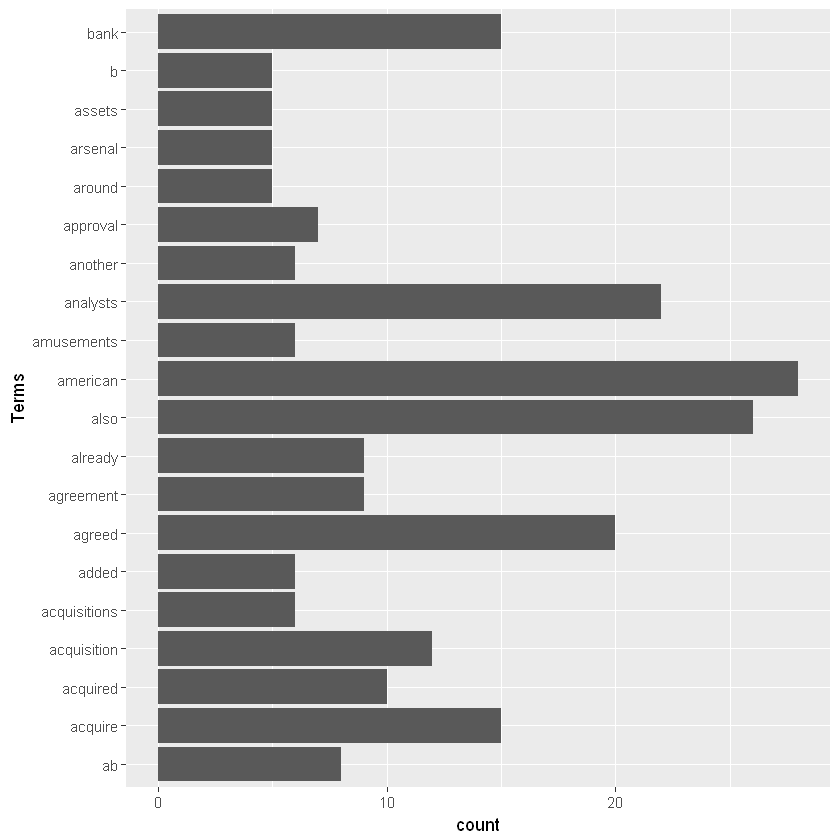

In [16]:
library(ggplot2)
ggplot(df[1:20,], aes(x = term, y = freq)) + geom_bar(stat = "identity") + xlab("Terms") + ylab("count") + coord_flip()
# too many words in dataframe, so I chose the first 20 words to show the plotting results, make it easy to understand

# clustering terms

In [17]:
#remove sparse terms
tdm2 <- removeSparseTerms(tdm, sparse=0.5)
tdm2

<<TermDocumentMatrix (terms: 7, documents: 50)>>
Non-/sparse entries: 249/101
Sparsity           : 29%
Maximal term length: 7
Weighting          : term frequency (tf)

In [18]:
distMatrix <- dist(scale(tdm2))
distMatrix

         company      dlrs       inc       mln       pct    reuter
dlrs    9.577327                                                  
inc     8.269926  8.540491                                        
mln     8.482035  5.817062  7.595656                              
pct     7.122868  9.666899  9.504971  8.889830                    
reuter  6.928409  8.942340  6.272056  6.947687  7.906532          
said   13.970366 13.240255 13.841417 14.302525 13.987685 12.228648

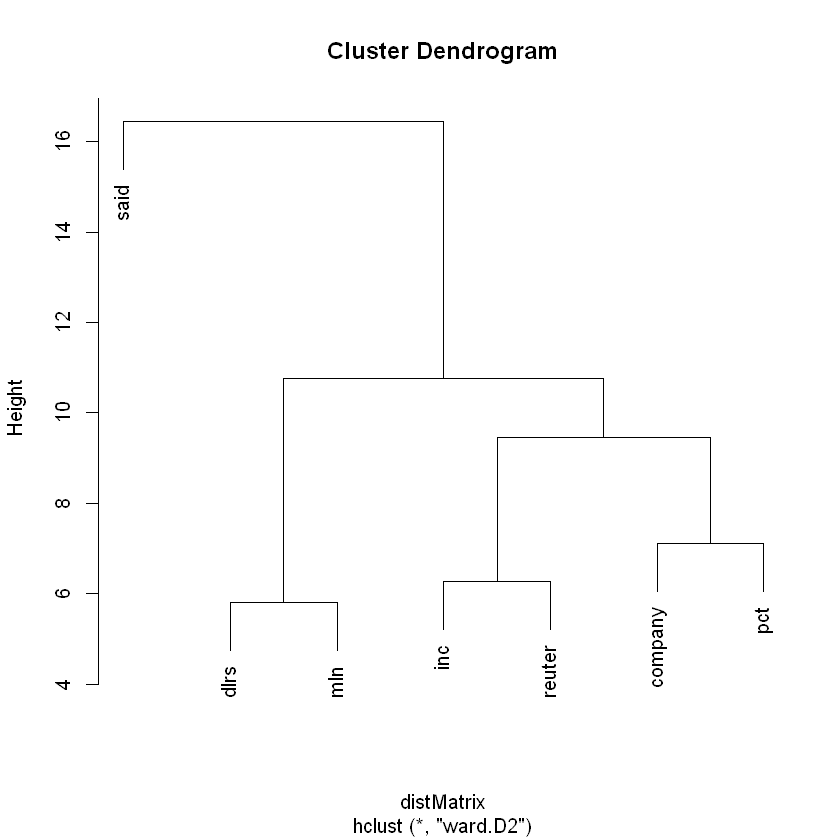

In [19]:
fit <- hclust(distMatrix, method = "ward.D2")
plot(fit)

In [20]:
tm <- t(distMatrix)
k <- 6
kr <- kmeans(tm, k)
round(kr$centers, digits=3)

,company,dlrs,inc,mln,pct,reuter,said
1,6.928,8.942,6.272,6.948,7.907,0.000,12.229
2,8.270,8.540,0.000,7.596,9.505,6.272,13.841
3,7.123,9.667,9.505,8.890,0.000,7.907,13.988
4,0.000,9.577,8.270,8.482,7.123,6.928,13.970
5,9.030,2.909,8.068,2.909,9.278,7.945,13.771
6,13.970,13.240,13.841,14.303,13.988,12.229,0.000


In [21]:
library(wordcloud)
m1 <- as.matrix(acqtdm)
word.freq <- sort(rowSums(m1), decreasing = T)
word.freq

Loading required package: RColorBrewer


the                   and                  said 
                  414                   173                   160 
                  for                   its                  dlrs 
                   91                    83                    71 
                  mln                   pct                reuter 
                   65                    63                    49 
              company                   has                  with 
                   48                    41                    40 
               shares                 would                  that 
                   39                    37                    36 
                 from                  will                   was 
                   35                    35                    34 
                stock                 offer                 which 
                   33                    29                    28 
             american                   inc                 share 
                   27                    27                    27 
                about                  also                common 
                   26                    26                    26 
                dlrs.                   not                 said. 
                   24                    24                    23 
                  had                  u.s.               express 
                   22                    22                    21 
               agreed            management                  they 
                   20                    20                    20 
                 corp                 group                   new 
                   19                    19                    19 
             analysts                  have                market 
                   18                    18                    18 
             shearson                 stake                  been 
                   18                    18                    17 
                  rmj            securities                  bank 
                   16                    16                    15 
               viacom               acquire                   all 
                   15                    14                    14 
                  are                   but                   buy 
                   14                    14                    14 
                  one               billion              exchange 
                   14                    13                    13 
             expected                  last                  part 
                   13                    13                    13 
               tender                 total                 value 
                   13                    13                    13 
             business                 could                hutton 
                   12                    12                    12 
                 inc,                   may                  some 
                   12                    12                    12 
          acquisition               capital                  cash 
                   11                    11                    11 
              courier               holding             statement 
                   11                    11                    11 
                  two              acquired                 being 
                   11                    10                    10 
             interest                merger                 owned 
                   10                    10                    10 
             redstone            subsidiary               already 
                   10                    10                     9 
            companies              company.                  each 
                    9                     9                     9 
                 four                   gas                   his 
                    9                     9                     9

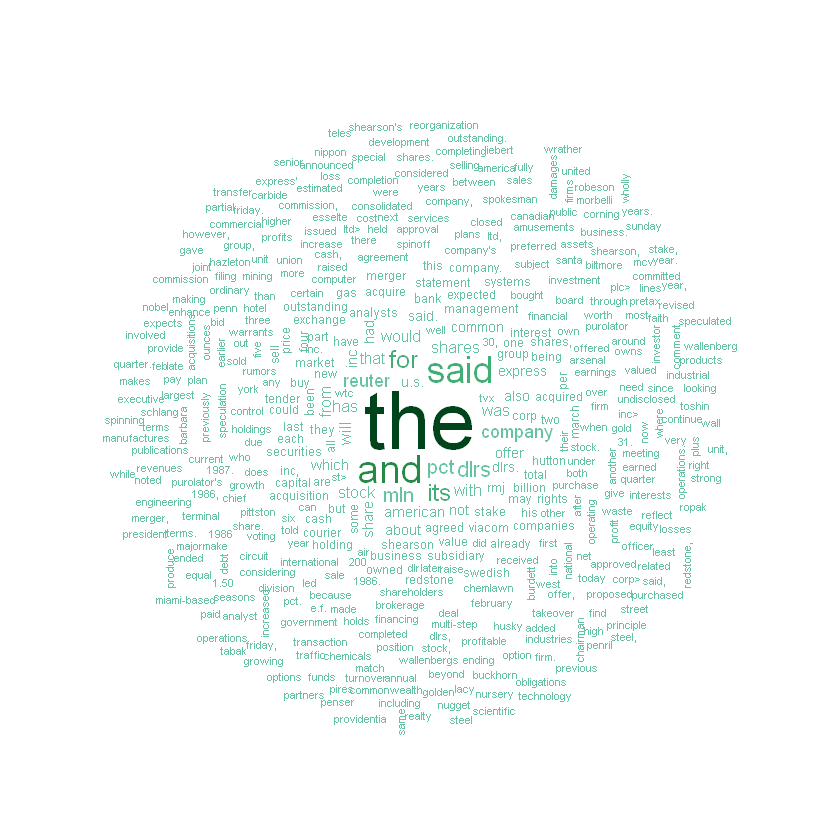

In [22]:
pal <- brewer.pal(9, "BuGn")
pal <- pal[-(1:4)]
wordcloud(words=names(word.freq), freq=word.freq, min.freq=3, random.order=F, colors=pal)

# finding ten longest documents

In [23]:
library(ngram)
doc_test <- acq
word_count=list()
for (i in 1:50){
    str <- as.character(doc_test[[i]])
    len <- wordcount(str, sep='', count.function=sum)
    word_count <- c(word_count, len)
}
word_count

[[1]]
[1] 1287

[[2]]
[1] 784

[[3]]
[1] 502

[[4]]
[1] 2308

[[5]]
[1] 337

[[6]]
[1] 381

[[7]]
[1] 3635

[[8]]
[1] 593

[[9]]
[1] 248

[[10]]
[1] 234

[[11]]
[1] 620

[[12]]
[1] 596

[[13]]
[1] 850

[[14]]
[1] 235

[[15]]
[1] 229

[[16]]
[1] 168

[[17]]
[1] 528

[[18]]
[1] 871

[[19]]
[1] 2457

[[20]]
[1] 1009

[[21]]
[1] 429

[[22]]
[1] 1873

[[23]]
[1] 587

[[24]]
[1] 602

[[25]]
[1] 3516

[[26]]
[1] 863

[[27]]
[1] 652

[[28]]
[1] 697

[[29]]
[1] 3109

[[30]]
[1] 213

[[31]]
[1] 336

[[32]]
[1] 448

[[33]]
[1] 637

[[34]]
[1] 1465

[[35]]
[1] 773

[[36]]
[1] 1043

[[37]]
[1] 618

[[38]]
[1] 460

[[39]]
[1] 805

[[40]]
[1] 429

[[41]]
[1] 362

[[42]]
[1] 1607

[[43]]
[1] 295

[[44]]
[1] 1022

[[45]]
[1] 510

[[46]]
[1] 547

[[47]]
[1] 3013

[[48]]
[1] 502

[[49]]
[1] 343

[[50]]
[1] 1068

In [24]:
names(word_count) <- c(1:50)
word_count

$`1`
[1] 1287

$`2`
[1] 784

$`3`
[1] 502

$`4`
[1] 2308

$`5`
[1] 337

$`6`
[1] 381

$`7`
[1] 3635

$`8`
[1] 593

$`9`
[1] 248

$`10`
[1] 234

$`11`
[1] 620

$`12`
[1] 596

$`13`
[1] 850

$`14`
[1] 235

$`15`
[1] 229

$`16`
[1] 168

$`17`
[1] 528

$`18`
[1] 871

$`19`
[1] 2457

$`20`
[1] 1009

$`21`
[1] 429

$`22`
[1] 1873

$`23`
[1] 587

$`24`
[1] 602

$`25`
[1] 3516

$`26`
[1] 863

$`27`
[1] 652

$`28`
[1] 697

$`29`
[1] 3109

$`30`
[1] 213

$`31`
[1] 336

$`32`
[1] 448

$`33`
[1] 637

$`34`
[1] 1465

$`35`
[1] 773

$`36`
[1] 1043

$`37`
[1] 618

$`38`
[1] 460

$`39`
[1] 805

$`40`
[1] 429

$`41`
[1] 362

$`42`
[1] 1607

$`43`
[1] 295

$`44`
[1] 1022

$`45`
[1] 510

$`46`
[1] 547

$`47`
[1] 3013

$`48`
[1] 502

$`49`
[1] 343

$`50`
[1] 1068

In [25]:
word_count <- sort(unlist(word_count), decreasing=TRUE)
ten_largest <- head(word_count, 10)
ten_largest

7   25   29   47   19    4   22   42   34    1 
3635 3516 3109 3013 2457 2308 1873 1607 1465 1287

so the ten longest documents are listed above 

In [26]:
q <- doc_stop[as.integer(names(word_count)[1])]
tdm1 <- TermDocumentMatrix(q, control = list(wordLengths = c(1,Inf)))
tdm2 <- removeSparseTerms(tdm1, sparse=0.5)
distM <- dist(scale(tdm2))
distM

                ability accompanied according acquisitions activity   added
accompanied     0.00000                                                    
according       0.00000     0.00000                                        
acquisitions    0.00000     0.00000   0.00000                              
activity        0.00000     0.00000   0.00000      0.00000                 
added           0.00000     0.00000   0.00000      0.00000  0.00000        
aftertax        0.00000     0.00000   0.00000      0.00000  0.00000 0.00000
along           0.00000     0.00000   0.00000      0.00000  0.00000 0.00000
also            0.52209     0.52209   0.52209      0.52209  0.52209 0.52209
american        5.74299     5.74299   5.74299      5.74299  5.74299 5.74299
analyst         0.00000     0.00000   0.00000      0.00000  0.00000 0.00000
analysts        3.65463     3.65463   3.65463      3.65463  3.65463 3.65463
analytical      0.00000     0.00000   0.00000      0.00000  0.00000 0.00000
announcement

draw the dendrogram 

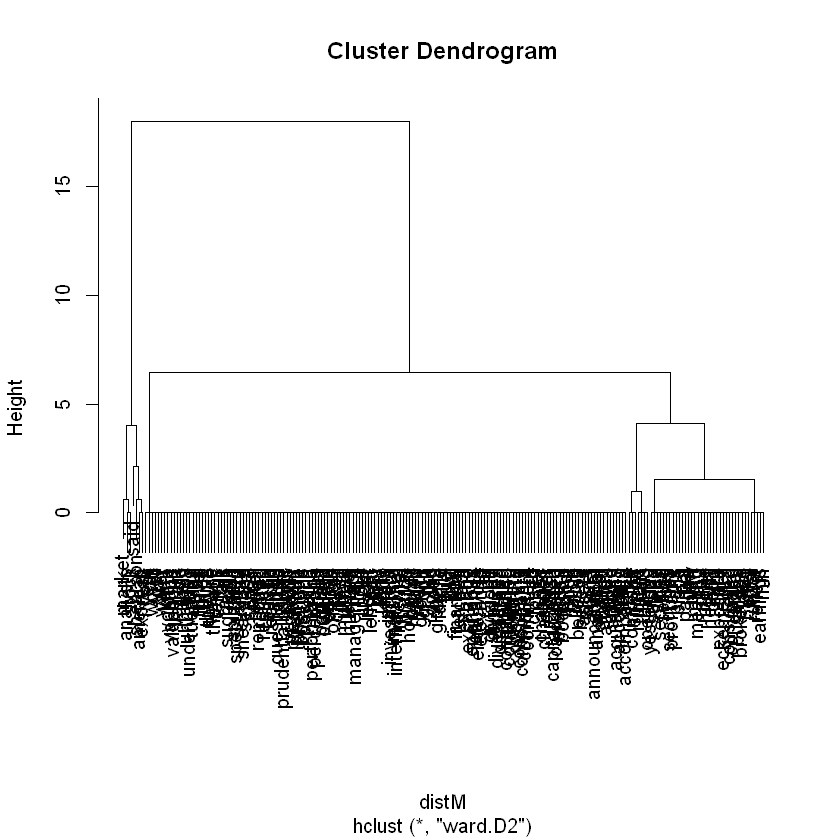

In [27]:
fit1 <- hclust(distM, method = "ward.D2")
plot(fit1)

draw the word cloud

In [28]:
m0 <- as.matrix(tdm2)
word.freq1 <- sort(rowSums(m1), decreasing = T)
word.freq1

the                   and                  said 
                  414                   173                   160 
                  for                   its                  dlrs 
                   91                    83                    71 
                  mln                   pct                reuter 
                   65                    63                    49 
              company                   has                  with 
                   48                    41                    40 
               shares                 would                  that 
                   39                    37                    36 
                 from                  will                   was 
                   35                    35                    34 
                stock                 offer                 which 
                   33                    29                    28 
             american                   inc                 share 
                   27                    27                    27 
                about                  also                common 
                   26                    26                    26 
                dlrs.                   not                 said. 
                   24                    24                    23 
                  had                  u.s.               express 
                   22                    22                    21 
               agreed            management                  they 
                   20                    20                    20 
                 corp                 group                   new 
                   19                    19                    19 
             analysts                  have                market 
                   18                    18                    18 
             shearson                 stake                  been 
                   18                    18                    17 
                  rmj            securities                  bank 
                   16                    16                    15 
               viacom               acquire                   all 
                   15                    14                    14 
                  are                   but                   buy 
                   14                    14                    14 
                  one               billion              exchange 
                   14                    13                    13 
             expected                  last                  part 
                   13                    13                    13 
               tender                 total                 value 
                   13                    13                    13 
             business                 could                hutton 
                   12                    12                    12 
                 inc,                   may                  some 
                   12                    12                    12 
          acquisition               capital                  cash 
                   11                    11                    11 
              courier               holding             statement 
                   11                    11                    11 
                  two              acquired                 being 
                   11                    10                    10 
             interest                merger                 owned 
                   10                    10                    10 
             redstone            subsidiary               already 
                   10                    10                     9 
            companies              company.                  each 
                    9                     9                     9 
                 four                   gas                   his 
                    9                     9                     9

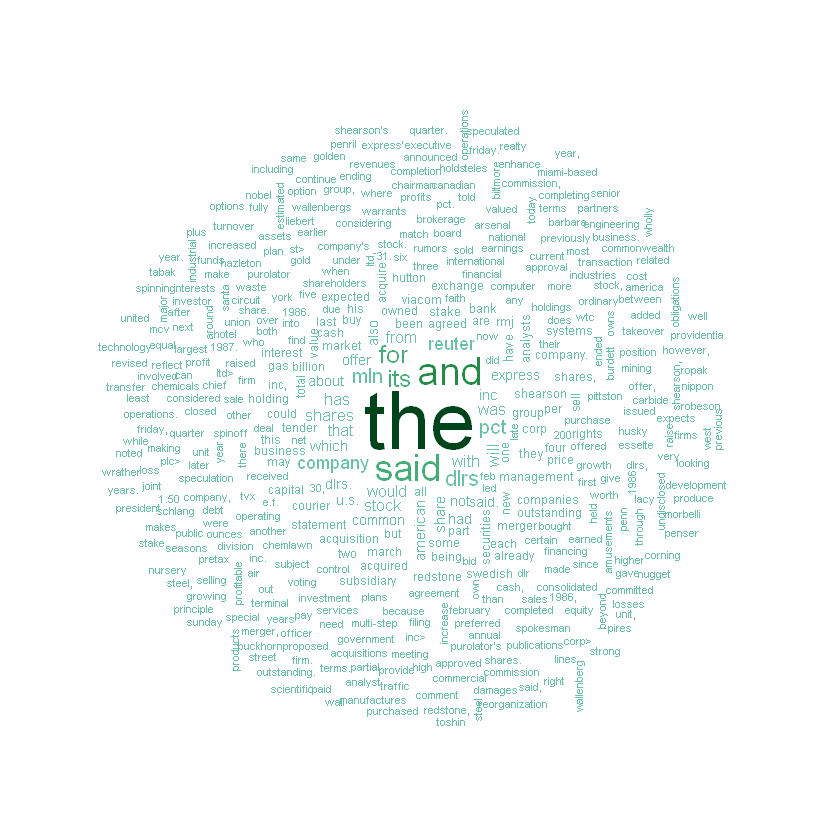

In [29]:
pal_cloud <- brewer.pal(9, "BuGn")
pal_cloud <- pal_cloud[-(1:4)]
wordcloud(words=names(word.freq1), freq=word.freq1, min.freq=3, random.order=F, colors=pal)

find the longest word and longest sentence

In [69]:
#longest sentences in 10 largest files
library('stringr')
library('textreuse')
for(i in 1:10){
    file <- acq[[as.integer(names(word_count)[i])]]
    file_str <- unlist(str_match_all(as.String(file), "[^\\s][^\\.\\!\\?]+[\\.\\!\\?]{1}") )
    text = ''
    word = ''
    for(j in 1:length(file_str)){
        text1 <- file_str[j]
    if (length(tokenize_words(file_str[j])) > length(tokenize_words(text))){
        text <- text1
        }
    temp <- tokenize_words(file_str[j])
    for (k in 1:length(temp)){
        if (nchar(temp[k]) > nchar(word)){
            word <- temp[k]
        }
    
    }
    
}
print(text)
print(word)
}

[1] "American Express Co remained silent on\nmarket rumors it would spinoff all or part of its Shearson\nLehman Brothers Inc, but some analysts said the company may be\nconsidering such a move because it is unhappy with the market\nvalue of its stock."
[1] "capitalization"
[1] "American Express Co, rumored to be\nconsidering a spinoff of part of Shearson Lehman Brothers Inc,\nsaid it is studying a range of options for its brokerage unit\nthat could improve Shearon's access to capital and help it meet\nbroadening international competition."
[1] "reorganization"
[1] "If all the shares of Purolator are tendered, shareholders\nwould receive for each share 29 dlrs cash, six dlrs in\ndebentures, and a warrant to buy shares in a subsidiary of PC\nAcquisition containing the U."
[1] "shareholders"
[1] "Besides the financing it would raise through a bank\nsyndicate, Bank of America has also agreed to provide a\nseparate 25 mln dlr for the limited purpose of partial\nfinancing and has committed t

# e Print a table of the length of each sentence in each of the 10 documents

In [72]:
file_e <- acq[[as.integer(names(word_count)[1])]]
file_str_e <- unlist(str_match_all(as.String(file), "[^\\s][^\\.\\!\\?]+[\\.\\!\\?]{1}") )
print(nchar(file_str_e))

 [1] 166  42  85  19 241 166  18 161  17  99 135  97


In [102]:
for (a in 1:10){
    file_e <- acq[[as.integer(names(word_count)[a])]]
    file_str_e <- unlist(str_match_all(as.String(file_e), "[^\\s][^\\.\\!\\?]+[\\.\\!\\?]{1}") )
    cat(paste('\ndocument',names(word_count)[a]),sep="\n")
    for(b in 1 : length(file_str_e)){
        t <- tokenize_words(file_str_e[b])
        cat(paste(length(t)," "))         
    }
    
}


document 7
43  31  19  20  12  23  23  22  12  20  30  20  14  25  31  20  17  7  4  12  10  14  9  23  5  20  12  31  13  27  19  
document 25
42  40  27  35  20  24  26  35  17  36  30  9  6  23  14  3  10  22  12  13  26  15  36  9  27  
document 29
26  9  2  12  20  8  10  28  24  2  36  2  36  15  6  4  24  8  23  14  12  10  21  1  13  23  14  14  10  14  7  11  33  26  
document 47
27  7  4  14  25  2  15  5  37  40  24  7  13  36  21  15  13  3  41  36  16  27  28  18  7  19  8  3  
document 19
36  38  31  14  20  10  8  12  8  9  19  41  38  29  28  27  21  28  
document 4
24  19  6  8  26  12  11  16  16  18  16  9  17  20  11  13  10  11  8  23  31  11  5  10  6  16  
document 22
13  22  19  6  10  24  13  3  14  2  9  24  3  9  27  22  30  13  16  27  21  
document 42
10  26  33  7  30  32  27  3  24  6  17  14  19  31  
document 34
17  15  25  4  5  10  5  26  7  33  21  39  4  25  17  
document 1
29  6  15  4  38  32  4  25  3  17  22  13  

# f. For each sentence of each document, remove the punctuation. Display the sentences.

In [116]:
file_f <- acq[[as.integer(names(word_count)[1])]]
file_str_f <- unlist(str_match_all(as.String(file_f), "[^\\s][^\\.\\!\\?]+[\\.\\!\\?]{1}") )
g <- gsub('[[:punct:]]+',' ',file_str_f)
g <- str_replace_all(g, "[\r\n]" , "")
g
# same for 9 other documents.

[1] "American Express Co remained silent onmarket rumors it would spinoff all or part of its ShearsonLehman Brothers Inc  but some analysts said the company may beconsidering such a move because it is unhappy with the marketvalue of its stock "
 [2] "American Express stock got a lift from the rumor  as themarket calculated a partially public Shearson may command agood market value  thereby boosting the total value of AmericanExpress "                                                    
 [3] "The rumor also was accompanied by talk the financialservices firm would split its stock and boost its dividend "                                                                                                                               
 [4] "American Express closed on the New York Stock Exchange at72 5 8  up 4 1 8 on heavy volume "                                                                                                                                                    
 [5] "American Express would not comment on the rumors or itsstock activity "                                                                                                                                                                        
 [6] "Analysts said comments by the company at an analysts meeting Tuesday helped fuel the rumors as did an announcementyesterday of management changes "                                                                                            
 [7] "At the meeting  company officials said American Expressstock is undervalued and does not fully reflect the performanceof Shearson  according to analysts "                                                                                     
 [8] "Yesterday  Shearson said it was elevating its chiefoperating officer  Jeffery Lane  to the added position ofpresident  which had been vacant "                                                                                                 
 [9] "It also created four newpositions for chairmen of its operating divisions "                                                                                                                                                                    
[10] "Analysts speculated a partial spinoff would make mostsense  contrary to one variation on market rumors of a totalspinoff "                                                                                                                     
[11] "Some analysts  however  disagreed that any spinoff ofShearson would be good since it is a strong profit center forAmerican Express  contributing about 20 pct of earnings lastyear "                                                           
[12] " I think it is highly unlikely that American Express isgoing to sell shearson  said Perrin Long of Lipper Analytical "                                                                                                                         
[13] "He questioned what would be a better investment than  a veryprofitable securities firm "                                                                                                                                                       
[14] "     Several analysts said American Express is not in need ofcash  which might be the only reason to sell a part of a strongasset "                                                                                                            
[15] "But others believe the company could very well ofconsidered the option of spinning out part of Shearson  and onerumor suggests selling about 20 pct of it in the market "                                                                      
[16] "Larry Eckenfelder of Prudential Bache Securities said hebelieves American Express could have considered a partialspinoff in the past "                                                                                                         
[17] " Shearson being as profitable as it is would have fetched a

# g. For each word print its part of speech using the Wordnet package

In [135]:
library(wordnet)
setDict("C:/Program Files (x86)/WordNet/2.1/dict")
Sys.setenv(WNHOME = "C:/Program Files (x86)/WordNet/2.1")

In [144]:
if(initDict()) {
    for(c in 1:length(g)){
        word <- tokenize_words(g[c])
        for(x in 1:length(word)){
            filter <- getTermFilter("StartsWithFilter", word[x], TRUE)
            getIndexTerms("NOUN", 5, filter)
            }
    }

}

# h. Analyze word frequency using functions from package zipfR